Hello! I'm Nigel and this is my first python notebook on the Titanic Dataset. I'm trying this without looking at other solutions, do give me feedback to help me improve!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/d/nigelyeap/titanic/train.csv
/kaggle/input/d/nigelyeap/titanic/test.csv
/kaggle/input/d/nigelyeap/titanic/gender_submission.csv


**ANALYSING THE GIVEN DATA**

In [29]:
ds_train=pd.read_csv("/kaggle/input/titanic/train.csv")
ds_test=pd.read_csv("/kaggle/input/titanic/test.csv")
ds_result=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
print("Train and Test data sets are imported successfully")
ds = pd.concat([ds_train, ds_test], ignore_index=True, sort  = False)

#ds.info()

In [3]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Using logical reasoning, we will be analysing gender,age,passenger class and fare to get a rough gauge of survivability.

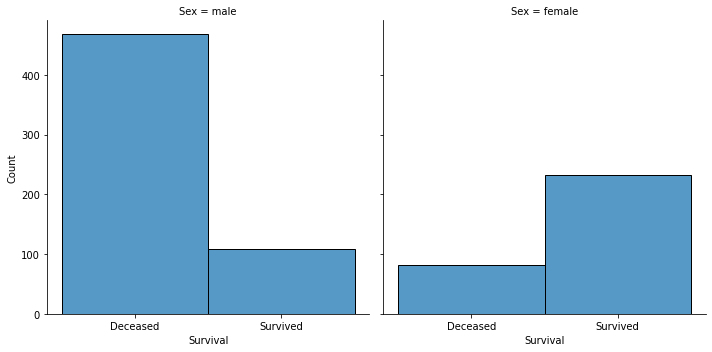

In [4]:
ds["Survival"] = ds["Survived"].map({1:"Survived",0:"Deceased"})
sns.displot(data = ds,x="Survival",col="Sex",discrete = True)

We can thus see that most men died while most women survived.

<AxesSubplot:xlabel='Age_ranges', ylabel='count'>

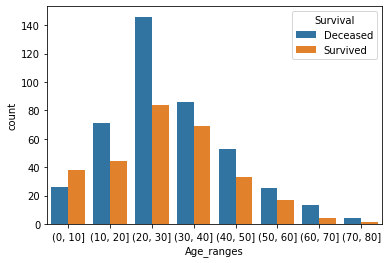

In [5]:
ds["Age_ranges"] = pd.cut(ds["Age"],[0,10,20,30,40,50,60,70,80]) 
sns.countplot(data=ds,x="Age_ranges",hue="Survival")

Thus, we can deduce that children under 10 were prioritised, while those older than 10 had a probability greater than 50% of dying. This is especially true for those between 20 to 30.

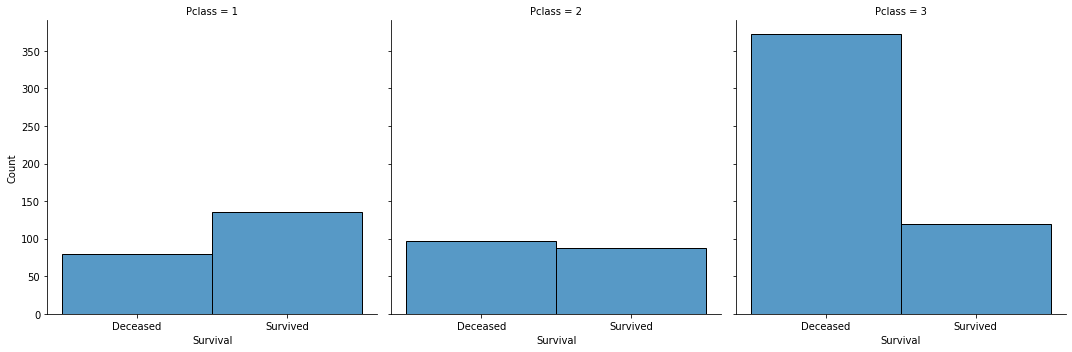

In [6]:
sns.displot(data=ds,x="Survival",col="Pclass",discrete = True)

Thus, we can tell that those in passenger class 3 had a lower probability of survival while those in passenger class 1 had a higher probability of survival.

In [7]:
ds["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare_ranges', ylabel='count'>

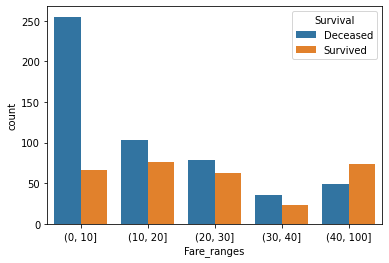

In [8]:

ds["Fare_ranges"]=pd.cut(ds["Fare"],[0,10,20,30,40,100])
sns.countplot(data=ds,x="Fare_ranges",hue="Survival")

Thus, with this we now know that all these columns are related to survivability. We can also deduce that Fare will need to be normalised, considering that there is a large degree of variance.
Another piece of information we have yet to consider is Siblings/Spouses and Parents on board. Let's see if they are relevant to our predictions.

<AxesSubplot:xlabel='Family_size', ylabel='count'>

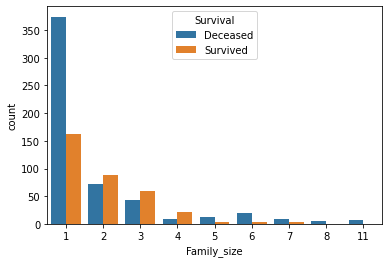

In [9]:
ds["Family_size"] = ds["SibSp"] + ds["Parch"] + 1
sns.countplot(data=ds,x="Family_size",hue="Survival")

Thus, we can tell there is a correlation between family_size and survival rates, with those alone having a much higher chance of dying.

We remove the column 'Ticket','Cabin' and 'PassengerID' as it is difficult to ascertain any important data from them.
We also remove the columns that we used for data visualisation purposes.

In [10]:
ds.drop(["Ticket","Cabin","Survival","Age_ranges","Fare_ranges","SibSp","Parch"],axis = 1,inplace = True)

ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1


Next, we use OHE to change the values for sex and Embarked to obtain numerical values

In [11]:
ds = pd.concat([ds,pd.get_dummies(ds["Sex"],prefix ="Sex_")],axis=1)
ds = pd.concat([ds,pd.get_dummies(ds["Embarked"],prefix ="Embarked_")],axis=1)
ds.drop(columns = ["Sex","Embarked"],axis=1, inplace = True)


ds.tail()

,PassengerId,Survived,Pclass,Name,Age,Fare,Family_size,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S
1304,1305,NaN,3,"Spector, Mr. Woolf",NaN,8.0500,1,0,1,0,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.0,108.9000,1,1,0,1,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.5,7.2500,1,0,1,0,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",NaN,8.0500,1,0,1,0,0,1
1308,1309,NaN,3,"Peter, Master. Michael J",NaN,22.3583,3,0,1,1,0,0


Using the previous data, we can tell that age has a few missing values. We will use the mean value of ages to fill in the missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Age          1309 non-null   float64
 5   Fare         1308 non-null   float64
 6   Family_size  1309 non-null   int64  
 7   Sex__female  1309 non-null   uint8  
 8   Sex__male    1309 non-null   uint8  
 9   Embarked__C  1309 non-null   uint8  
 10  Embarked__Q  1309 non-null   uint8  
 11  Embarked__S  1309 non-null   uint8  
dtypes: float64(3), int64(3), object(1), uint8(5)
memory usage: 78.1+ KB


,PassengerId,Survived,Pclass,Name,Age,Fare,Family_size,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S
1304,1305,NaN,3,"Spector, Mr. Woolf",0.000000,8.0500,1,0,1,0,0,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0.708081,108.9000,1,1,0,1,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0.669256,7.2500,1,0,1,0,0,1
1307,1308,NaN,3,"Ware, Mr. Frederick",0.000000,8.0500,1,0,1,0,0,1
1308,1309,NaN,3,"Peter, Master. Michael J",0.000000,22.3583,3,0,1,1,0,0


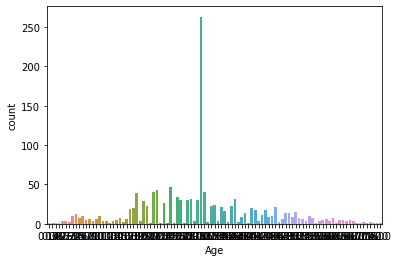

In [12]:
ds["Age"].fillna(ds["Age"].mean(),inplace = True)
ds.info()
sns.countplot(data=ds,x="Age")

#Seeing as the data is normally distriibuted, we can use standard scaler.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ds["Age"] = ss.fit_transform(ds["Age"].values.reshape(-1,1))
ds.tail()

Next, we interpret the titles in the name. 

In [13]:

ds["Title"] = ds["Name"].str.extract("([A-Za-z]+)\.", expand=False)

ds['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

Seeing as Mlle,Ms and Mme represent the same values as other titles, we replace them.
Furthermore, There are many unique titles, that we can classify under 'unique' and use One Hot Encoding to optimise our values.

In [14]:
ds['Title'] = ds['Title'].replace('Mlle', 'Miss')
ds['Title'] = ds['Title'].replace('Ms', 'Miss')
ds['Title'] = ds['Title'].replace('Mme', 'Mrs')
ds['Title'] = ds['Title'].replace([ 'Don', 'Rev','Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt','Countess','Jonkheer'], 'Unique')
    
ds = pd.concat([ds,pd.get_dummies(ds["Title"],prefix ="Title_")],axis=1)
ds.drop(columns = ["Name","Title"],axis = 1,inplace = True)
ds.head()

,PassengerId,Survived,Pclass,Age,Fare,Family_size,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S,Title__Dona,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Unique
0,1,0.0,3,-0.611972,7.2500,2,0,1,0,0,1,0,0,0,1,0,0
1,2,1.0,1,0.630431,71.2833,2,1,0,1,0,0,0,0,0,0,1,0
2,3,1.0,3,-0.301371,7.9250,1,1,0,0,0,1,0,0,1,0,0,0
3,4,1.0,1,0.397481,53.1000,2,1,0,0,0,1,0,0,0,0,1,0
4,5,0.0,3,0.397481,8.0500,1,0,1,0,0,1,0,0,0,1,0,0


Finally, we use standard scaler on fare to normalise the data on fares.


In [15]:
ds["Fare"] = ss.fit_transform(ds["Fare"].values.reshape(-1,1))
ds.tail(500)

,PassengerId,Survived,Pclass,Age,Fare,Family_size,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S,Title__Dona,Title__Master,Title__Miss,Title__Mr,Title__Mrs,Title__Unique
809,810,1.0,1,0.242180,0.382778,2,1,0,0,0,1,0,0,0,0,1,0
810,811,0.0,3,-0.301371,-0.491081,1,0,1,0,0,1,0,0,0,1,0,0
811,812,0.0,3,0.708081,-0.176762,1,0,1,0,0,1,0,0,0,1,0,0
812,813,0.0,2,0.397481,-0.440587,1,0,1,0,0,1,0,0,0,1,0,0
813,814,0.0,3,-1.854374,-0.039051,7,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0.000000,-0.487940,1,0,1,0,0,1,0,0,0,1,0,0
1305,1306,NaN,1,0.708081,1.461271,1,1,0,1,0,0,1,0,0,0,0,0
1306,1307,NaN,3,0.669256,-0.503402,1,0,1,0,0,1,0,0,0,1,0,0
1307,1308,NaN,3,0.000000,-0.487940,1,0,1,0,0,1,0,0,0,1,0,0


Finally, we do a few checks on the data to catch any holes and adjust accordingly

In [16]:
ds.isnull().any()
ds["Fare"].fillna(ds["Fare"].median(),inplace = True)

In [25]:
x_test = ds[ds["Survived"].isnull()].drop(["Survived"],axis=1)
x = ds.dropna()
y_train = x["Survived"]
x_train = x.drop(["Survived"],axis=1)
y_test = ds_result
y_train

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

Logistic Regression:

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  #for accuracy_score

logreg = LogisticRegression(solver = "lbfgs",max_iter=1000,random_state = 1)
logreg.fit(x_train, y_train)
y_predicted_lr = logreg.predict(x_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(y_predicted_lr,y_test["Survived"])*100,2))

The accuracy of the Logistic Regression is 92.34


Random Forests:

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = "entropy",n_estimators = 1000,random_state = 1)
rf.fit(x_train, y_train)
y_predicted_rf = rf.predict(x_test)
print('The accuracy of the Random Forest is',round(accuracy_score(y_predicted_rf,y_test["Survived"])*100,2))

The accuracy of the Random Forest is 83.73


In [20]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)
y_predicted_svm = clf.predict(x_test)
print('The accuracy of the SVM is',round(accuracy_score(y_predicted_svm,y_test["Survived"])*100,2))

The accuracy of the SVM is 63.64


Gaussian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(x_train,y_train)
y_predicted_gnb=model.predict(x_test)
print("The accuracy of the Gaussian Naive Bayes Theorem is",round(accuracy_score(y_predicted_gnb,y_test["Survived"])*100,2))

The accuracy of the Gaussian Naive Bayes Theorem is 92.82


array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [22]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(x_train,y_train)
y_predicted_ada=model.predict(x_test)
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(y_predicted_ada,y_test["Survived"])*100,2))

The accuracy of the AdaBoostClassifier is 89.71


By Logic, we use GaussianNB  to ascertain our final values.

In [34]:
output = pd.DataFrame({'PassengerId': x_test.PassengerId, 'Survived': y_predicted_rf.astype("int")})
output.to_csv('submission.csv', index=False)
print("Submission saved!")

Your submission was successfully saved!
